In [22]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [23]:
# Get data
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


In [24]:
train.head()

,TrainId,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
# Check for duplicates   
if len(train.TrainId) == len(set(train.TrainId)):
    print "no duplicates"
else:
    print "duplicates"
train = train.drop("TrainId", axis = 1)

no duplicates


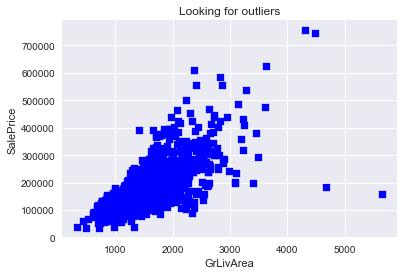

In [26]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [27]:
train = train.ix[~((train.GrLivArea>4000) & (train.SalePrice<300000))]

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


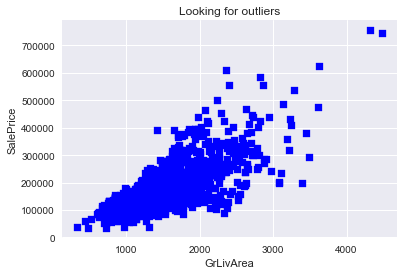

In [28]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [29]:
train_labels = train.SalePrice
train_features = train.drop(['SalePrice'],axis=1)

In [30]:
train_features = train_features[['GrLivArea','MSSubClass','OverallQual','OverallCond']]
train_features.columns.size

4

In [31]:
# Get data
test = pd.read_csv("test.csv")
print("test : " + str(test.shape))
test.head()

test : (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
# Check for duplicates   
if len(test.Id) == len(set(test.Id)):
    print "no duplicates"
else:
    print "duplicates"
test = test.drop("Id", axis = 1)

no duplicates


In [33]:
test_features = test[['GrLivArea','MSSubClass','OverallQual','OverallCond']]
test_features.columns.size

4

In [34]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)

(1458, 4)
(1458,)
(1459, 4)


In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(train_features, train_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
train_labels_pred = lr.predict(train_features)
test_labels_pred = lr.predict(test_features)
print(train_labels_pred.shape)
print(test_labels_pred.shape)

(1458,)
(1459,)


In [37]:
print(train_labels.values)
print(train_labels_pred)

[208500 181500 223500 ..., 266500 142125 147500]
[ 222308.55976047  170354.95494007  227295.91190166 ...,  260128.51998754
  126853.45470641  138534.35840551]


In [38]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, train_features, train_labels, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, test_features, test_labels_pred, scoring = scorer, cv = 10))
    return(rmse)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())

('RMSE on Training set :', 38944.451705271815)
('RMSE on Test set :', 1.4460084097566764e-10)


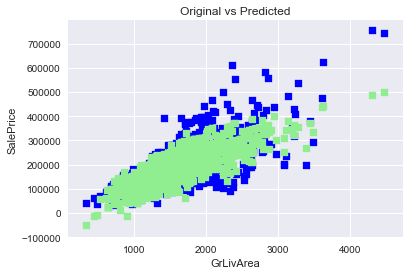

In [39]:
# Plot predictions
plt.scatter(train_features.GrLivArea, train_labels, c = "blue", marker = "s", label = "Training data")
plt.scatter(train_features.GrLivArea, train_labels_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Original vs Predicted")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()